# Graded Challenge 3 (Ensemble Learning)

# بِسْمِ ٱللّٰهِ ٱلرَّحْمٰنِ ٱلرَّحِيمِ‎
---
## Introduction

**Nama : Luthfi Fadhlillah**
<br>
**Batch : FTDS 009**

Kumpulan data yang akan digunakan berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia.

---


### Dataset Information

Dataset didapatkan dari https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

---

## Import Libraries
Melakukan import pustaka yang dibutuhkan dalam proses analisis dataset.

---

In [501]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

## Data Loading

In [502]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [503]:
df = data.copy()

In [504]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [505]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


- Dataset memiliki 299 baris dan 13 kolom
- Kita memiliki informasi pribadi seperti Age, anaemia, creatinine, diabetes dll yang merupakan fitur dan DEATH_EVENT adalah label/target.

## Data Exploration

In [506]:
len(df)

299

In [507]:
df.shape

(299, 13)

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [509]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [510]:
nmbr_cols = list(df.select_dtypes("number").columns)
nmbr_cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [511]:
df[["DEATH_EVENT"]].describe().T

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,299.0,0.32107,0.46767,0.0,0.0,0.0,1.0,1.0


### Cek Missing Values dan Duplicate Rows


In [512]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing values dalam datasets.

In [513]:
df.duplicated().any()

False

Tidak terdapat duplicate rows.

## Exploratory Data Analysis (EDA)

### Numerical Values

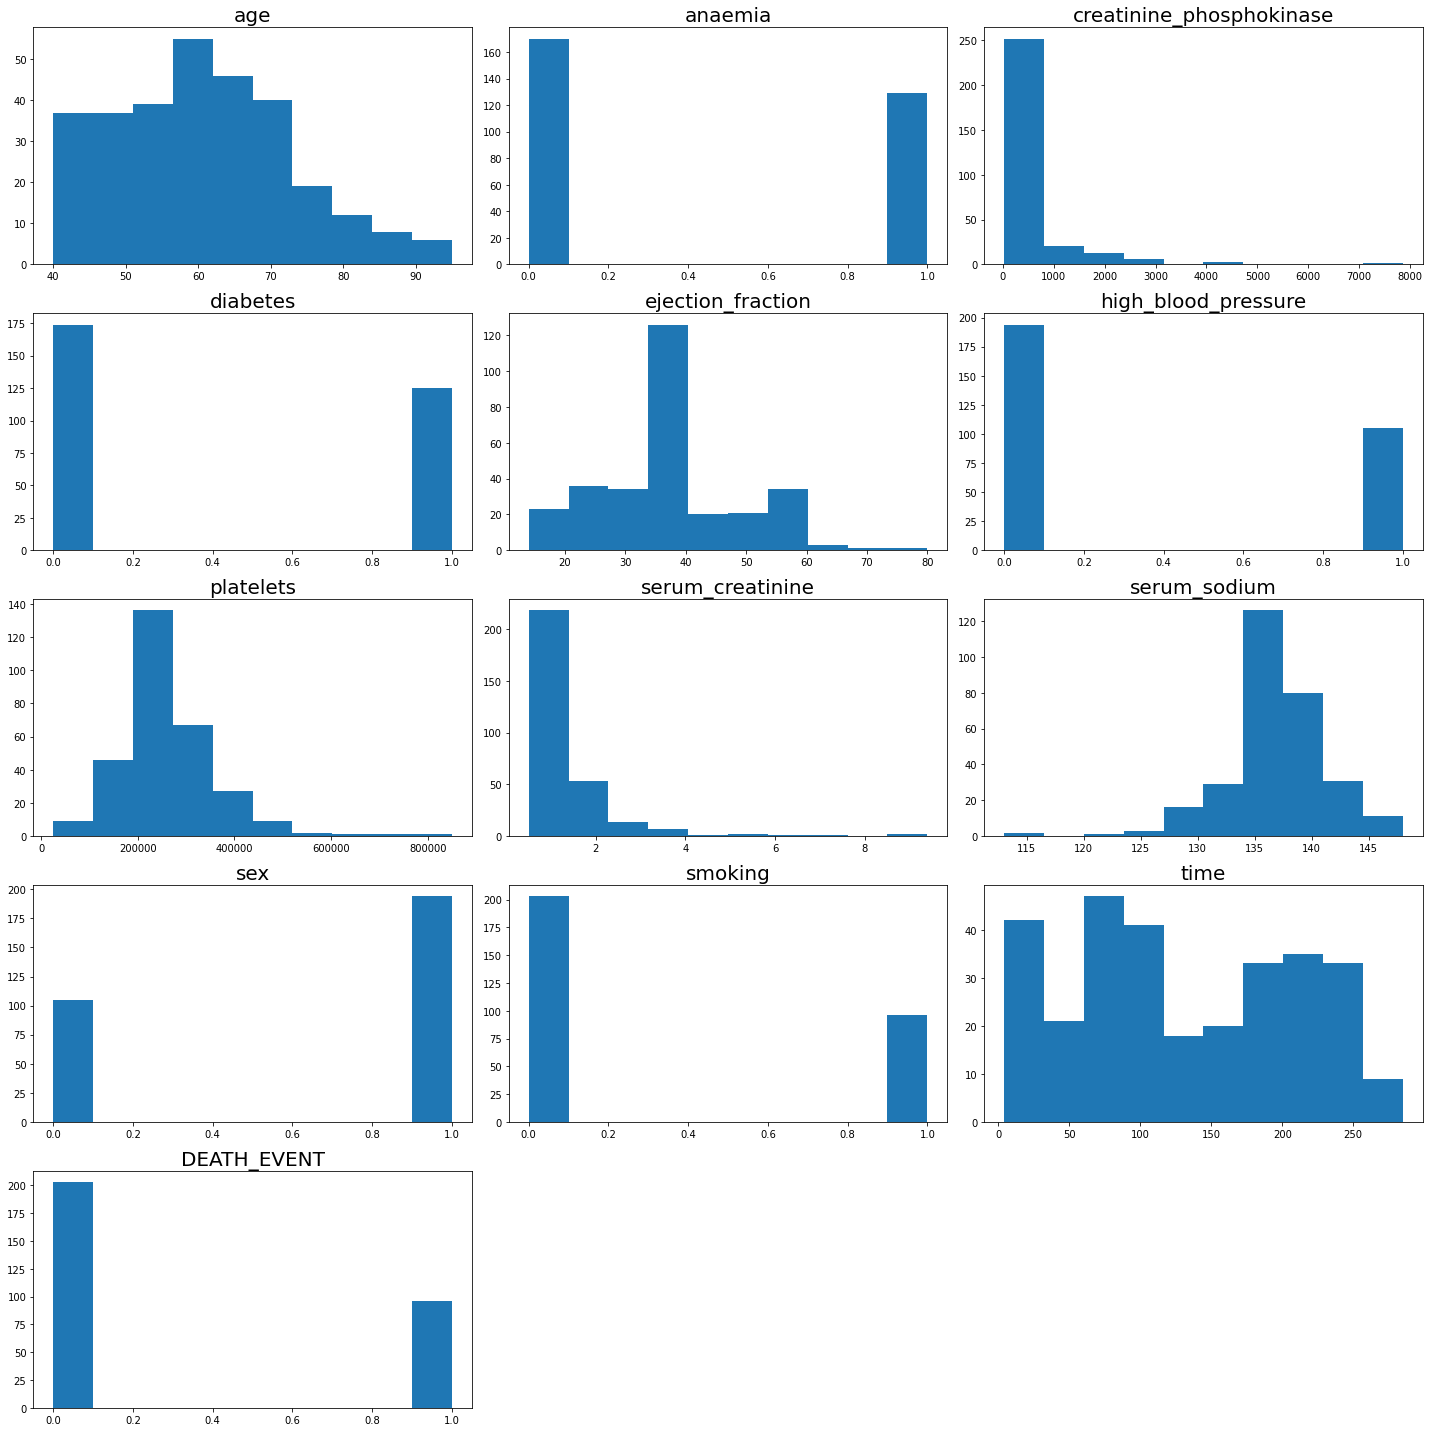

In [514]:
#Melakukan plot untuk feature numerical
plt.figure(figsize = (20, 20))
for i in range(len(nmbr_cols)):
    plt.subplot(len(nmbr_cols)//3+1, 3, i + 1)
    plt.hist(df[nmbr_cols[i]])
    plt.title(nmbr_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

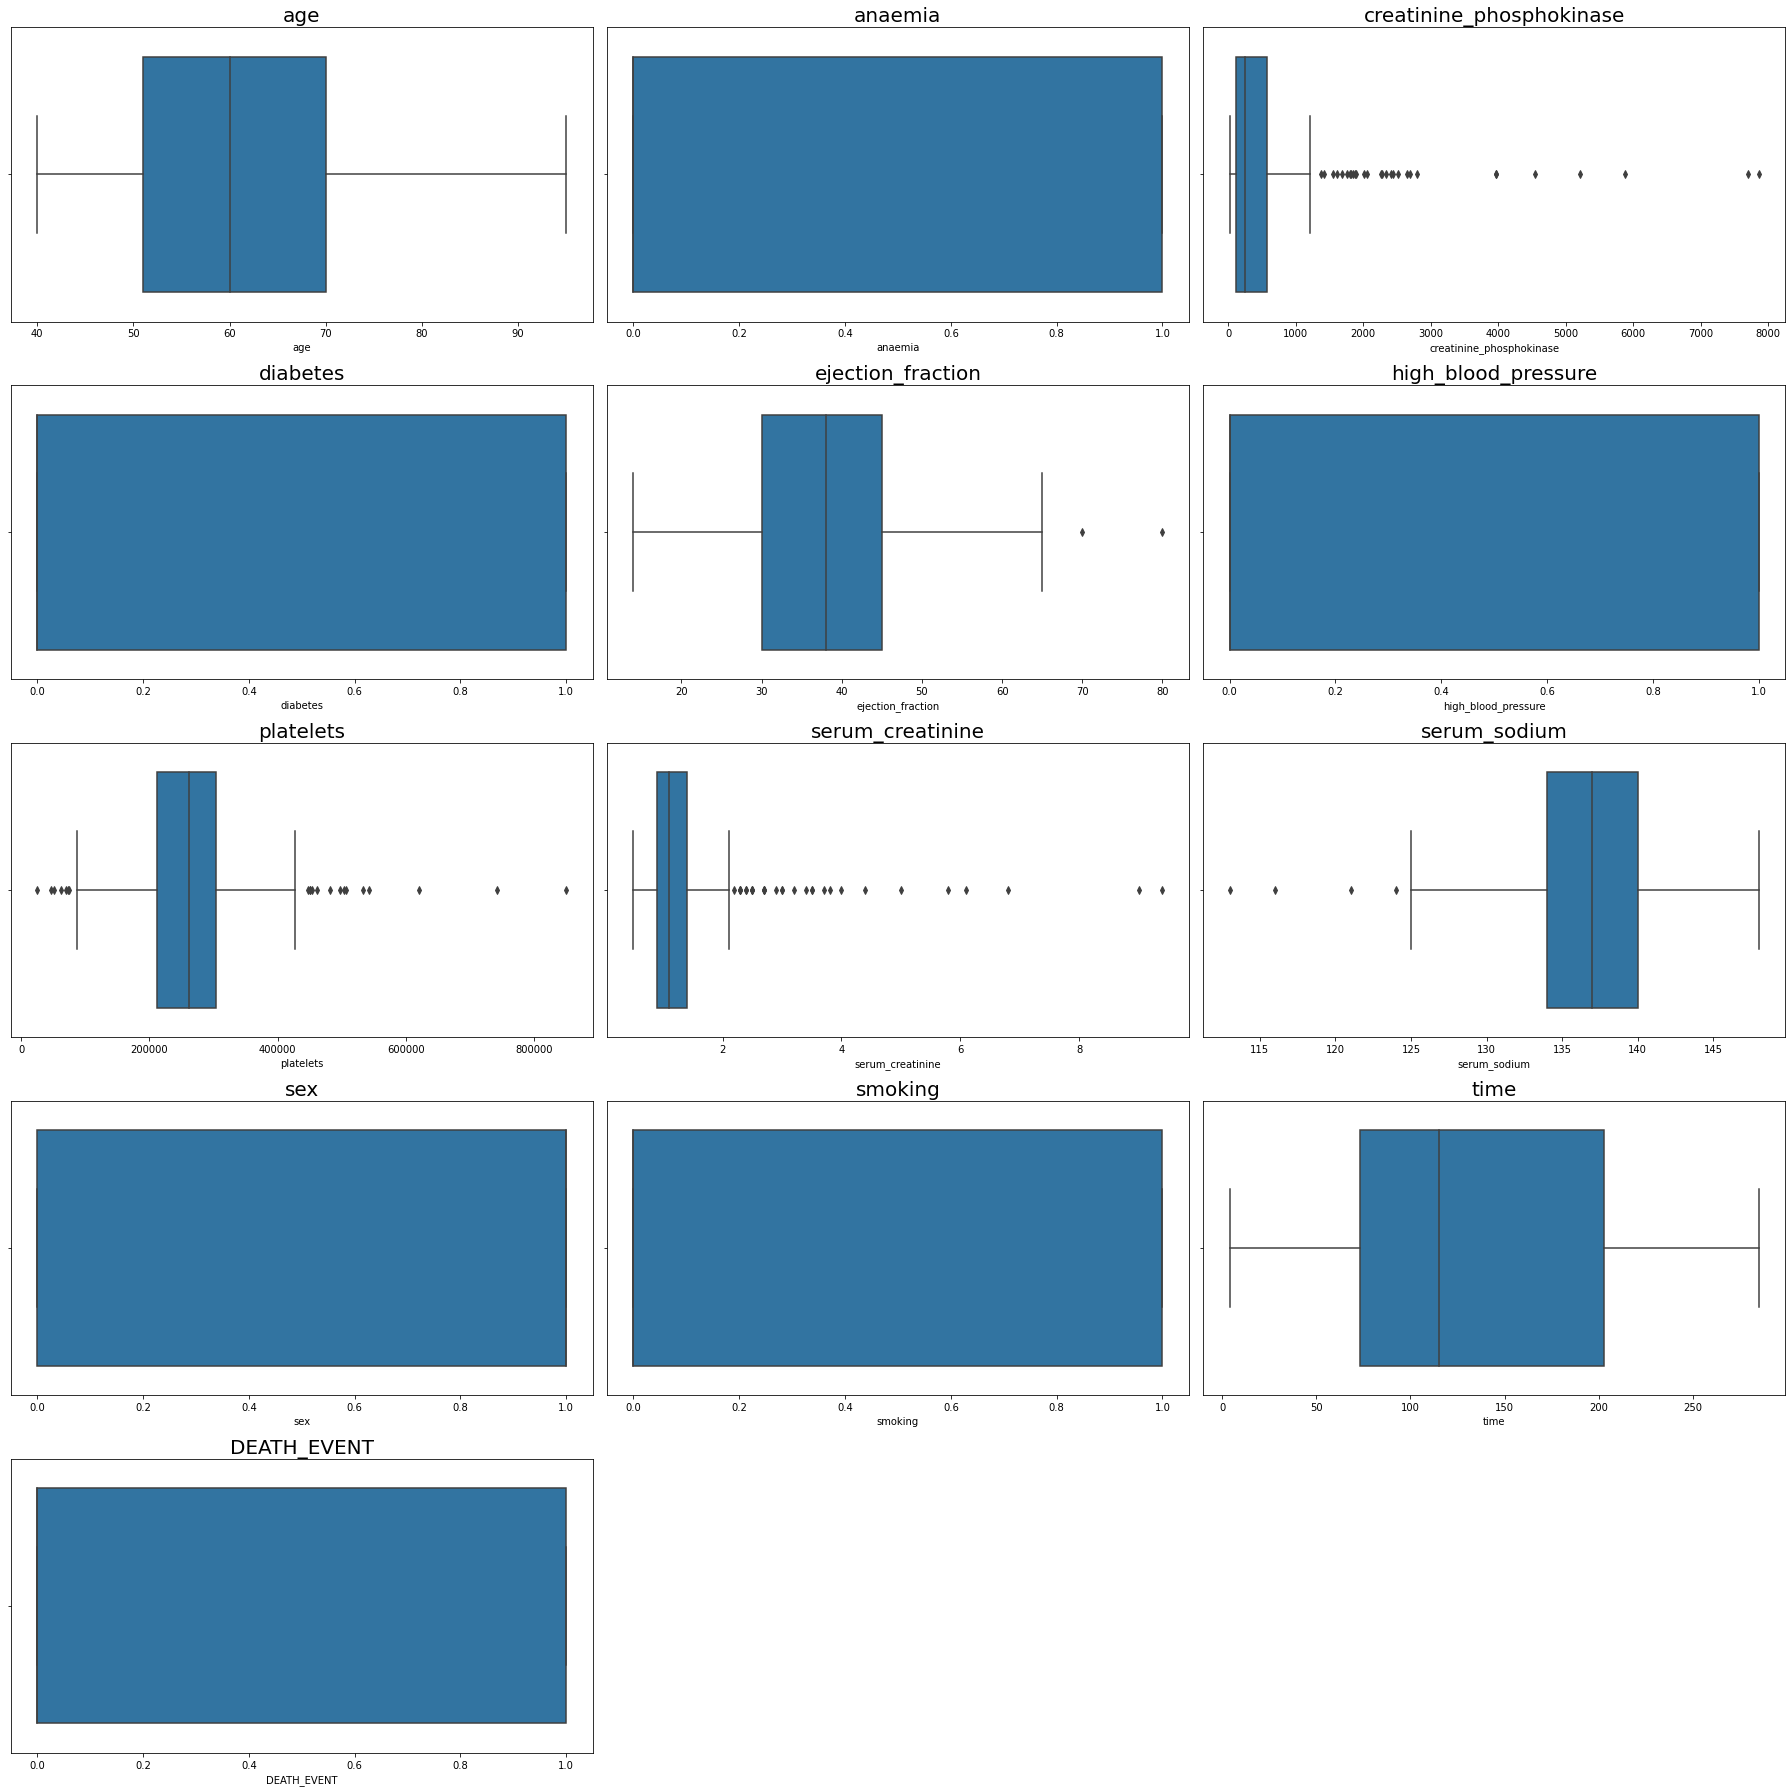

In [515]:
# melakukan plot untuk feature numerical
plt.figure(figsize = (25, 25))
for i in range(len(nmbr_cols)):
    plt.subplot(len(nmbr_cols)//3+1, 3, i + 1)
    sns.boxplot(x = df[nmbr_cols[i]])
    plt.title(nmbr_cols[i], fontsize = 20)
plt.tight_layout()
plt.show()

<AxesSubplot:>

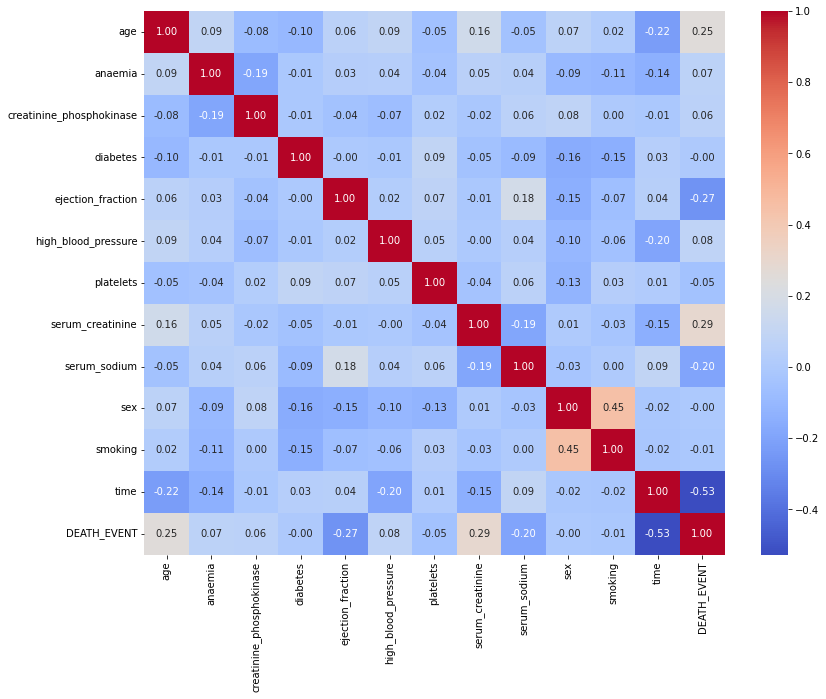

In [516]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

age, serum_creatinine feature tampaknya memiliki korelasi yang signifikan dengan probabilitas DEATH_EVENT. ejection_fraction dan serum_sodium juga berkorelasi negatif dengan DEATH_EVENT.

Ini tidak berarti bahwa fitur lain tidak berguna. Kita perlu mendalami fitur-fitur ini untuk menentukan korelasinya.

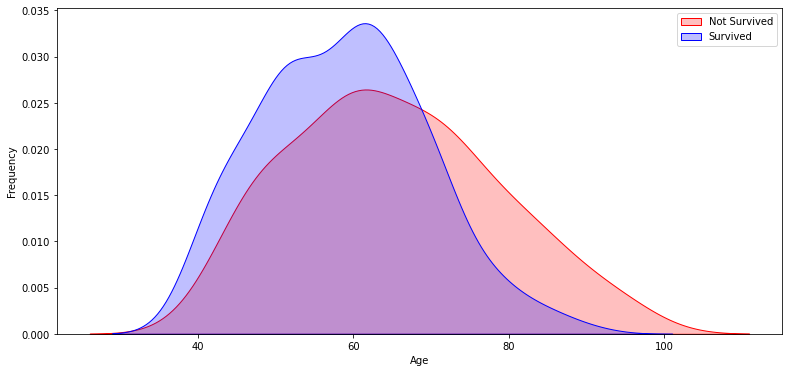

In [517]:
# Explorasi Age vs DEATH_EVENT
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["age"][df["DEATH_EVENT"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["age"][df["DEATH_EVENT"] == 0], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g.legend(["Not Survived","Survived"])


Ketika kita memplot `age` terhadap fitur `DEATH_EVENT`, kita bisa dengan jelas melihat peak yang menunjukan kerentanan usia terhadap tingkat kematian terjadi pada usia 40-70 an tahun sedangkan untuk bayi dan anak-anak yang sangat kecil terjadi kasus kematian.

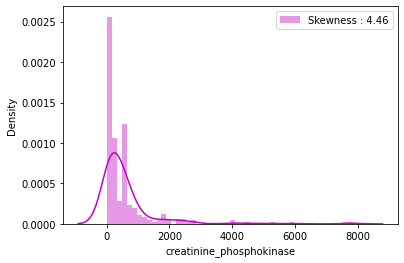

In [518]:
g = sns.distplot(df["creatinine_phosphokinase"], color="m", label="Skewness : %.2f"%(df["creatinine_phosphokinase"].skew()))
g = g.legend(loc="best")

In [519]:
df["creatinine_phosphokinase"] = df["creatinine_phosphokinase"].map(lambda i: np.log(i) if i > 0 else 0)

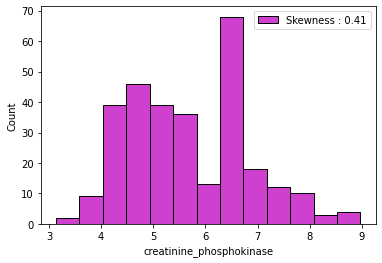

In [520]:
g = sns.histplot(df["creatinine_phosphokinase"], color="m", label="Skewness : %.2f"%(df["creatinine_phosphokinase"].skew()))
g = g.legend(loc="best")

Skewness jelas berkurang setelah transformasi log

### Categorical Values

**Anemia**

Text(0, 0.5, 'Survival Probability')

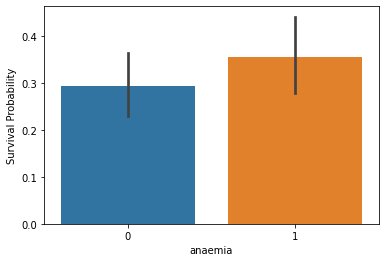

In [521]:
g = sns.barplot(x="anaemia",y="DEATH_EVENT",data=df)
g.set_ylabel("Survival Probability")

**Sex**

Text(0, 0.5, 'Survival Probability')

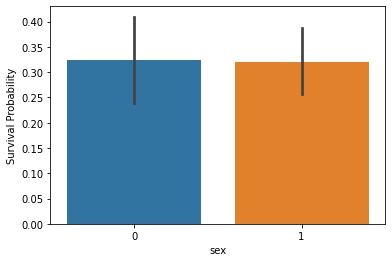

In [522]:
g = sns.barplot(x="sex",y="DEATH_EVENT",data=df)
g.set_ylabel("Survival Probability")

In [523]:
df[["sex","DEATH_EVENT"]].groupby('sex').mean()

,DEATH_EVENT
sex,
0,0.323810
1,0.319588


- Gender pasien Male = 1, Female = 0
- Menurut pengamatan Male dan Female keduanya memiliki peluang yang sama untuk bertahan hidup. Jadi Seks, mungkin tidak memainkan peran penting dalam DEATH_EVENT.

**Diabetes**

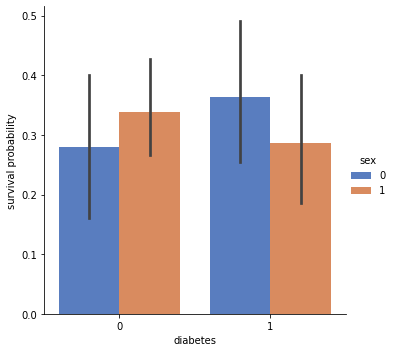

In [524]:
g = sns.catplot(x="diabetes", y="DEATH_EVENT", hue="sex", data=df,
                   kind="bar", palette="muted")
g.set_ylabels("survival probability")

Jelas bahwa wanita/female dengan diabetes memiliki lebih banyak kemungkinan heart fail

**High Blood**

Text(0, 0.5, 'Survival Probability')

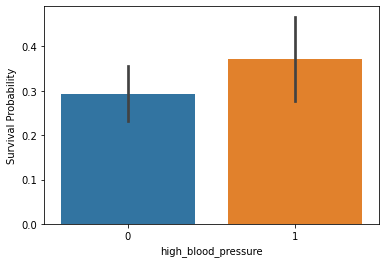

In [525]:
g = sns.barplot(x="high_blood_pressure",y="DEATH_EVENT",data=df)
g.set_ylabel("Survival Probability")

Orang dengan tekanan darah tinggi memiliki lebih banyak peluang gagal jantung.

## Data Preprocessing

In [526]:
# 5 categorical variables
cat_variables = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] 

for variable in cat_variables:
    data[variable] = data[variable].astype('category')

In [527]:
# 6 numerical variables
numerical_variables = ['age', 'creatinine_phosphokinase',
                        'platelets', 'serum_creatinine',
                        'serum_sodium', 'time']

In [528]:
data[numerical_variables].describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


In [529]:
data["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [530]:
print("{:.2F} dari data tersebut adalah kelas negatif dan {:.2F} positif ".format(203/299, 69/299))

0.68 dari data tersebut adalah kelas negatif dan 0.23 positif 


Jika saya memilih akurasi untuk menjadi metrik saya, itu akan memberikan hasil yang optimis bahkan jika pengklasifikasi tidak berfungsi dengan baik
Saya akan menggunakan `confusion matrics`, `ROC`, `average_precision`, dan `ROC_AUC` untuk mengevaluasi kinerja clasifier
setelah mencoba algoritma klasifikasi yang berbeda pada akurasi.

In [531]:
#spliting the scaled data
x_train_preprocessed, x_test_preprocessed, y_train_preprocessed, y_test_preprocessed = train_test_split(x_preprocessed_data,
                                                                                           y_preprocessed_data,
                                                                                           test_size=0.2,
                                                                                           shuffle=True,
                                                                                           random_state=0)

In [532]:
df = pd.get_dummies(df, columns = ["anaemia"], prefix="ena")
df = pd.get_dummies(df, columns = ["diabetes"], prefix="dia")
df = pd.get_dummies(df, columns = ["high_blood_pressure"], prefix="hbp")
df = pd.get_dummies(df, columns = ["sex"], prefix="sex")
df = pd.get_dummies(df, columns = ["smoking"], prefix="smk")

In [533]:
df.time.value_counts()

250    7
187    7
10     6
186    6
107    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: time, Length: 148, dtype: int64

### Data Split

In [534]:
X = df.drop(["DEATH_EVENT"], axis=1)
y = df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

### Feature Selection

In [535]:
X_train_num = X_train._get_numeric_data()

## Build Pipeline

In [536]:
pipe_rf = Pipeline([
('scaler', StandardScaler()),
('rf', RandomForestClassifier(random_state=7))                    
])

pipe_cat = Pipeline([
('scaler', StandardScaler()),
('catboost', CatBoostClassifier(random_state=7))
])

pipe_xgb = Pipeline([
('scaler', StandardScaler()),
('xgb', XGBClassifier(random_state=7))
])

pipe_ada = Pipeline([
('scaler', StandardScaler()),
('ada', AdaBoostClassifier(random_state=7))
])

pipe_gb = Pipeline([
('scaler', StandardScaler()),
('gb', GradientBoostingClassifier(random_state=7))
])

pipe_bag = Pipeline([
('scaler', StandardScaler()),
('bag', BaggingClassifier(random_state=7)) 
])


## Modeling & Evaluation for Base Model


**Random Forest**

In [537]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.9111


In [538]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [539]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.90      0.76      0.83        25

    accuracy                           0.91        90
   macro avg       0.91      0.86      0.88        90
weighted avg       0.91      0.91      0.91        90



In [540]:
print(roc_auc_score(y_test, y_rf_pred))

0.8646153846153846


## Boosting

In [541]:
rf_adaboost_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                                             max_leaf_nodes=10,
                                                                             n_estimators=100,
                                                                             n_jobs=-1,
                                                                             random_state=0),
                                       
                                       n_estimators=100,
                                       learning_rate=0.1,
                                       algorithm='SAMME.R',
                                       random_state=0)

rf_adaboost_model.fit(X_train , y_train)
rf_adaboost_train_score = rf_adaboost_model.score(X_train , y_train)

print("RandomForestClassifier AdaBoost Classifier Score: {:.3F}".format(rf_adaboost_train_score))


# AdaBoostClassifier evaluated using shuffle-split cross-validation 
rf_adaboost_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=3, random_state=0)
rf_adaboost_val_scores = cross_val_score(rf_adaboost_model, X_train , y_train, cv=rf_adaboost_shuffle_split)
print("RandomForestClassifier AdaBoost Classifier Cross validation Score: {:.3F}".format(np.mean(rf_adaboost_val_scores)))

RandomForestClassifier AdaBoost Classifier Score: 0.957
RandomForestClassifier AdaBoost Classifier Cross validation Score: 0.810


In [542]:
g_boosting_model = GradientBoostingClassifier(n_estimators=500,
                                             learning_rate=0.01,
                                             random_state=0,
                                             max_depth=5)

g_boosting_model.fit(X_train , y_train)
g_boosting_train_score = g_boosting_model.score(X_train , y_train)

print("Gradient Boosting Classifier Score: {:.3F}".format(g_boosting_train_score))


# GradientBoostingClassifier evaluated using shuffle-split cross-validation 
g_boosting_shuffle_split = StratifiedShuffleSplit(train_size=0.8, test_size=0.2, n_splits=3, random_state=0)
g_boosting_val_scores = cross_val_score(g_boosting_model, X_train , y_train, cv=g_boosting_shuffle_split)
print("Gradient Boosting Classifier Cross validation Score: {:.3F}".format(np.mean(g_boosting_val_scores)))

# overfitting

Gradient Boosting Classifier Score: 1.000
Gradient Boosting Classifier Cross validation Score: 0.746


## Soft Voting Classifiers

In [543]:
soft_Voting_Classifiers_test_acc =  soft_voting_model.score(x_test_preprocessed, y_test_preprocessed)
print("Soft Voting Classifiers Testing Accuracy: {:.3F}".format(soft_Voting_Classifiers_test_acc))

Soft Voting Classifiers Testing Accuracy: 0.817


In [544]:
confusion_matrix(y_test_preprocessed, soft_voting_model.predict(x_test_preprocessed))

array([[35,  2],
       [ 9, 14]], dtype=int64)

In [545]:
True_Positive = 15
True_Negative = 35
False_Positive = 2
False_Negative = 8

In [546]:
Soft_Voting_Classifiers_Precision_score = precision_score(y_test_preprocessed,
                                                          soft_voting_model.predict(x_test_preprocessed))

print("Soft Voting Classifiers Precision score: {}".format(Soft_Voting_Classifiers_Precision_score))

Soft Voting Classifiers Precision score: 0.875


In [547]:
Soft_Voting_Classifiers_Recall_score = recall_score(y_test_preprocessed,
                                                    soft_voting_model.predict(x_test_preprocessed))

print("Soft Voting Classifiers Recall score: {}".format(Soft_Voting_Classifiers_Recall_score))

Soft Voting Classifiers Recall score: 0.6086956521739131


In [548]:
Soft_Voting_Classifiers_F1_score = f1_score(y_test_preprocessed,
                                            soft_voting_model.predict(x_test_preprocessed))

print("Soft Voting Classifiers F1 score: {}".format(Soft_Voting_Classifiers_F1_score))

Soft Voting Classifiers F1 score: 0.717948717948718


In [549]:
Soft_Voting_Classifiers_Average_Precision_score = average_precision_score(y_test_preprocessed,
                                                                   soft_voting_model.predict_proba(x_test_preprocessed)[:,1])

print("Soft Voting Classifiers Average Precision score: {}".format(Soft_Voting_Classifiers_Average_Precision_score))

Soft Voting Classifiers Average Precision score: 0.8738850250531558


In [550]:
Soft_Voting_Classifiers_ROC_AUC_score = roc_auc_score(y_test_preprocessed,
                                                      soft_voting_model.predict_proba(x_test_preprocessed)[:,1])

print("Soft Voting Classifiers ROC AUC Score: {}".format(Soft_Voting_Classifiers_ROC_AUC_score))

Soft Voting Classifiers ROC AUC Score: 0.8836662749706228


In [551]:
models = pd.DataFrame({
    'Model': ['Soft Voting Classifiers', 
             'Bagging Classifier using RandomForestClassifier',
             'AdaBoost Classifier using RandomForestClassifier'],
    
    'Testset Accuracy': [soft_Voting_Classifiers_test_acc,
                        Bagging_Classifier_using_RandomForestClassifier_test_acc,
                        AdaBoost_Classifier_using_RandomForestClassifier_test_acc],
    
    
    'Precision Score': [Soft_Voting_Classifiers_Precision_score,
                       Bagging_Classifiernusing_RandomForestClassifier_Precision_score,
                       AdaBoost_Classifier_using_RandomForestClassifier_Precision_score],
    
    
    'Recall': [Soft_Voting_Classifiers_Recall_score,
              Bagging_Classifiernusing_RandomForestClassifier_Recall_score,
              AdaBoost_Classifier_using_RandomForestClassifier_Recall_score],


    'F1 score':[Soft_Voting_Classifiers_F1_score,
               Bagging_Classifiernusing_RandomForestClassifier_F1_score,
               AdaBoost_Classifier_using_RandomForestClassifier_F1_score],
    

    'Average Precision Score':[Soft_Voting_Classifiers_Average_Precision_score,
                              Bagging_Classifiernusing_RandomForestClassifier_Average_Precision_score,
                              AdaBoost_Classifier_using_RandomForestClassifier_Average_Precision_score],
    

    'ROC AUC Score': [Soft_Voting_Classifiers_ROC_AUC_score,
                     Bagging_Classifiernusing_RandomForestClassifier_ROC_AUC_score,
                     AdaBoost_Classifier_using_RandomForestClassifier_ROC_AUC_score]})


models

,Model,Testset Accuracy,Precision Score,Recall,F1 score,Average Precision Score,ROC AUC Score
0,Soft Voting Classifiers,0.816667,0.875000,0.608696,0.717949,0.873885,0.883666
1,Bagging Classifier using RandomForestClassifier,0.850000,0.937500,0.652174,0.769231,0.929995,0.952996
2,AdaBoost Classifier using RandomForestClassifier,0.800000,0.823529,0.608696,0.700000,0.899816,0.917744


## Others Model for Base Model


**Random Forest**

In [456]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  1.0
Testing Score:  0.9111


In [457]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [458]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.90      0.76      0.83        25

    accuracy                           0.91        90
   macro avg       0.91      0.86      0.88        90
weighted avg       0.91      0.91      0.91        90



In [459]:
print(roc_auc_score(y_test, y_rf_pred))

0.8646153846153846


**XGBoost**


In [460]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

[23:14:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score:  1.0
Testing Score:  0.8556


In [461]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [462]:
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        65
           1       0.80      0.64      0.71        25

    accuracy                           0.86        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.85      0.86      0.85        90



In [463]:
print(roc_auc_score(y_test, y_xgb_pred))

0.7892307692307693


**Gradient Boost**


In [464]:
pipe_gb.fit(X_train, y_train)
print('Training Score: ',round(pipe_gb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_gb.score(X_test, y_test),4))


Training Score:  1.0
Testing Score:  0.8889


In [465]:
y_gb_pred = pipe_gb.predict(X_test)
y_gb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [466]:
print(classification_report(y_test, y_gb_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        65
           1       0.80      0.80      0.80        25

    accuracy                           0.89        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.89      0.89      0.89        90



In [467]:
print(roc_auc_score(y_test, y_gb_pred))

0.8615384615384616


## Base Model Comparison

### Accuracy

In [468]:
rf = pipe_rf.score(X_test, y_test)
xgb = pipe_xgb.score(X_test, y_test)
gb = pipe_gb.score(X_test, y_test)

print('Random Forest : ',round(rf,2)*100, '%')
print('XGBoost : ',round(xgb,2)*100, '%')
print('Gradient Boosting : ',round(gb,2)*100, '%')


Random Forest :  91.0 %
XGBoost :  86.0 %
Gradient Boosting :  89.0 %


**F1 Score**

In [469]:
rf = f1_score(y_test, pipe_rf.predict(X_test))
xgb = f1_score(y_test, pipe_xgb.predict(X_test))
gb = f1_score(y_test, pipe_gb.predict(X_test))

print('Random Forest : ',round(rf,2)*100, '%')
print('XGBoost : ',round(xgb,2)*100, '%')
print('Gradient Boosting : ',round(gb,2)*100, '%')


Random Forest :  83.0 %
XGBoost :  71.0 %
Gradient Boosting :  80.0 %


**ROC-AUC**

In [470]:
rf = roc_auc_score(y_test, pipe_rf.predict(X_test))
xgb = roc_auc_score(y_test, pipe_xgb.predict(X_test))
gb = roc_auc_score(y_test, pipe_gb.predict(X_test))

print('Random Forest : ',round(rf,2)*100, '%')
print('XGBoost : ',round(xgb,2)*100, '%')
print('Gradient Boosting : ',round(gb,2)*100, '%')


Random Forest :  86.0 %
XGBoost :  79.0 %
Gradient Boosting :  86.0 %


In [471]:
models = {
    'Random Forest': pipe_rf,
    'XGBoost': pipe_xgb,
    'Gradient Boosting': pipe_gb,
}

metrics = {
    'accuracy': accuracy_score,
    'F1': f1_score,
    'AUC': roc_auc_score
}

df_model = pd.DataFrame(columns= models.keys(), index=['accuracy', 'F1', 'AUC'])

for metric in metrics:
    for model in models:
        df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [472]:
df_model

,Random Forest,XGBoost,Gradient Boosting
accuracy,0.911111,0.855556,0.888889
F1,0.826087,0.711111,0.8
AUC,0.864615,0.789231,0.861538


## Cross validation

In [473]:
models_dict = {}

In [474]:
models_dict["RandomForest"] = RandomForestClassifier(random_state = 14, max_depth = 30, max_features = 'auto', min_samples_leaf = 10, min_samples_split = 2, n_estimators = 100)
models_dict["GradientBoosting"] = GradientBoostingClassifier(random_state = 14, learning_rate = 0.1, n_estimators = 100)
models_dict["XGBoost"] = XGBClassifier(random_state = 14, learning_rate = 0.1, n_estimators = 100)

In [475]:
def display_score(scores):
    '''
    function to display cross validation mean and std.
    '''
    print(f"Scores: {scores}")
    print(f"Scores mean: {scores.mean()}")
    print(f"Scores Standar Deviation: {scores.std()}")

In [476]:
# create list to store cv scores
scores_cv = []

for model_name, model in models_dict.items():
    print(f"Cross Validation Scores of {model_name}")
    scores = cross_val_score(model, X_train, y_train, scoring = 'roc_auc', cv = 5)
    scores_cv.append(scores)
    display_score(scores)
    print("\n")

Cross Validation Scores of RandomForest
Scores: [0.92346939 0.8877551  0.88265306 0.84938272 0.88888889]
Scores mean: 0.8864298311917361
Scores Standar Deviation: 0.02352226515346011


Cross Validation Scores of GradientBoosting
Scores: [0.89795918 0.86734694 0.81377551 0.82222222 0.85978836]
Scores mean: 0.8522184429327287
Scores Standar Deviation: 0.030841604124528212


Cross Validation Scores of XGBoost
[23:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like

## Model Optimization

In [477]:
## parameter tuning

param_rf = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'rf__criterion' : ['gini', 'entropy'],
    'rf__n_estimators' : np.arange(100,501, 100),
    'rf__max_depth' : np.arange(2,8,2)
}

param_xgb = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'xgb__learning_rate' : [0.1, 0.01, 0.001],
    'xgb__n_estimators':np.arange(100,501,100)
}

param_gb = {
    'scaler' : [StandardScaler(), MinMaxScaler()],
    'gb__learning_rate' : [0.1, 0.01, 0.001],
    'gb__n_estimators':np.arange(100,501,100)
}




## Model Tuning Result & Evaluation

**Random Forest**

In [478]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=10).fit(X_train, y_train)

In [479]:
print('Train Set Score : ', grid_rf.score(X_train, y_train))
print('Test Set Score : ', grid_rf.score(X_test, y_test))

Train Set Score :  0.9090909090909091
Test Set Score :  0.8888888888888888


In [480]:
best_param_rf = grid_rf.best_params_
print(best_param_rf)
print('\n')
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
print('\n')
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'rf__criterion': 'entropy', 'rf__max_depth': 4, 'rf__n_estimators': 100, 'scaler': StandardScaler()}


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=4,
                                        random_state=7))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_rf__criterion', 'param_rf__max_depth', 'param_rf__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [481]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        65
           1       0.89      0.68      0.77        25

    accuracy                           0.89        90
   macro avg       0.89      0.82      0.85        90
weighted avg       0.89      0.89      0.88        90



In [482]:
print(roc_auc_score(y_test, best_pipe_rf.predict(X_test)))

0.8246153846153846


**XGB Classifier**

In [483]:
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=10).fit(X_train, y_train)


[23:17:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [484]:
print('Train Set Score : ', grid_xgb.score(X_train, y_train))
print('Test Set Score : ', grid_xgb.score(X_test, y_test))


Train Set Score :  1.0
Test Set Score :  0.8777777777777778


In [485]:
best_param_xgb = grid_xgb.best_params_
print(best_param_xgb)
print('\n')
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
print('\n')
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'scaler': StandardScaler(), 'xgb__learning_rate': 0.1, 'xgb__n_estimators': 100}


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=7, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_

In [486]:
print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        65
           1       0.82      0.72      0.77        25

    accuracy                           0.88        90
   macro avg       0.86      0.83      0.84        90
weighted avg       0.88      0.88      0.88        90



In [487]:
print(roc_auc_score(y_test, best_pipe_xgb.predict(X_test)))

0.8292307692307692


**Gradient Boosting**

In [488]:
grid_gb = GridSearchCV(pipe_gb, param_gb, cv=10).fit(X_train, y_train)


In [489]:
print('Train Set Score : ', grid_gb.score(X_train, y_train))
print('Test Set Score : ', grid_gb.score(X_test, y_test))

Train Set Score :  0.9473684210526315
Test Set Score :  0.8888888888888888


In [490]:
best_param_gb = grid_gb.best_params_
print(best_param_gb)
print('\n')
best_pipe_gb = grid_gb.best_estimator_
print(best_pipe_gb)
print('\n')
result_df_gb = pd.DataFrame.from_dict(grid_gb.cv_results_, orient='columns')
print(result_df_gb.columns)

{'gb__learning_rate': 0.01, 'gb__n_estimators': 300, 'scaler': StandardScaler()}


Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=300,
                                            random_state=7))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_gb__learning_rate', 'param_gb__n_estimators', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [491]:
print(classification_report(y_test, best_pipe_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92        65
           1       0.83      0.76      0.79        25

    accuracy                           0.89        90
   macro avg       0.87      0.85      0.86        90
weighted avg       0.89      0.89      0.89        90



In [492]:
print(roc_auc_score(y_test, best_pipe_gb.predict(X_test)))

0.8492307692307692


## Model After Tuning Comparison

**Accuracy**

In [493]:
rf_acc = best_pipe_rf.score(X_test, y_test)
xgb_acc = best_pipe_xgb.score(X_test, y_test)
gb_acc = best_pipe_gb.score(X_test, y_test)

print('Random Forest : ',round(rf_acc,2)*100, '%')
print('XGBoost : ',round(xgb_acc,2)*100, '%')
print('Gradient Boosting : ',round(gb_acc,2)*100, '%')

Random Forest :  89.0 %
XGBoost :  88.0 %
Gradient Boosting :  89.0 %


**F1 Score**

In [494]:
rf_f1 = f1_score(y_test, best_pipe_rf.predict(X_test))
xgb_f1 = f1_score(y_test, best_pipe_xgb.predict(X_test))
gb_f1 = f1_score(y_test, best_pipe_gb.predict(X_test))

print('Random Forest : ',round(rf_f1,2)*100, '%')
print('XGBoost : ',round(xgb_f1,2)*100, '%')
print('Gradient Boosting : ',round(gb_f1,2)*100, '%')


Random Forest :  77.0 %
XGBoost :  77.0 %
Gradient Boosting :  79.0 %


**ROC-AUC**

In [495]:
rf_roc = roc_auc_score(y_test, best_pipe_rf.predict(X_test))
xgb_roc = roc_auc_score(y_test, best_pipe_xgb.predict(X_test))
gb_roc = roc_auc_score(y_test, best_pipe_gb.predict(X_test))


print('Random Forest : ',round(rf_roc,2)*100, '%')
print('XGBoost : ',round(xgb_roc,2)*100, '%')
print('Gradient Boosting : ',round(gb_roc,2)*100, '%')


Random Forest :  82.0 %
XGBoost :  83.0 %
Gradient Boosting :  85.0 %


Model terbaik setelah melakukan tuning berdasarkan nilai AUC nya adalah Gradient Boosting

## Model Inference

In [496]:
df_inf = data.sample(50)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
47,60.000,0,582,1,38,1,451000.00,0.60,138,1,1,40,1
148,75.000,1,582,0,30,0,225000.00,1.83,134,1,0,113,1
93,60.000,1,154,0,25,0,210000.00,1.70,135,1,0,82,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
179,55.000,0,835,0,40,0,279000.00,0.70,140,1,1,147,0
135,75.000,0,582,0,40,0,263358.03,1.18,137,1,0,107,0
174,65.000,0,198,1,35,1,281000.00,0.90,137,1,1,146,0
282,42.000,0,64,0,30,0,215000.00,3.80,128,1,1,250,0
285,55.000,1,170,1,40,0,336000.00,1.20,135,1,0,250,0
259,53.000,0,56,0,50,0,308000.00,0.70,135,1,1,231,0


In [497]:
X_inf = df.drop(["DEATH_EVENT"], axis=1)
y_inf = df["DEATH_EVENT"]

In [498]:
best_pipe_gb.fit(X_inf, y_inf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            n_estimators=300,
                                            random_state=7))])

In [499]:
y_inf_pred = best_pipe_gb.predict(X_inf)
y_inf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtyp

In [500]:
print(classification_report(y_inf, y_inf_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       203
           1       0.94      0.84      0.89        96

    accuracy                           0.93       299
   macro avg       0.94      0.91      0.92       299
weighted avg       0.93      0.93      0.93       299



## Conclusion

**Model Analysis**

- Pada model random forest hasil akurasi permodelan untuk training sebesar 100% namun hasil akurasi saat testing menurun 91.11%. Pada saat melakukan proses train dan test pada random forest ini ada indikasi overfitting

- Saat melakukan model tunning dengan hyperparameter hasil akurasi permodelan untuk training sebesar 90% dan hasil akurasi testing sebesar 88.9% yang artinya data testing hasilnya tidak berbeda jauh dengan data training

- Metode boosting pada random forest yang terbaik adalah model AdaBoost dengan nilai ROC-AUC 91%



**Overall Analysis**

Random forest merupakan model yang terbaik untuk melakukan klasifikasi pada dataset heart failure clinical records dengan overall akurasi sebesar 89%. Model tuning dengan hyperparameter, grid search, dan boosting mempengaruhi akurasi model random forest dengan hasil akurasi terbaik dihasilkan pada grid search random forest.